Elnino - Regression analysis

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [3]:
names = '''obs
year
month
day
date
latitude
longitude
zon.winds
mer.winds
humidity
air temp.
s.s.temp.'''.split('\n')

nino = pd.read_csv('/content/gdrive/tao-all2.dat', sep=' ', names=names, na_values='.', 
                   parse_dates=[[1,2,3]])

def clean_cols(val):
    return val.replace('.', '_').replace(' ', '_')

nino = (nino
  .rename(columns=clean_cols)
  .assign(air_temp_F=lambda df_: df_.air_temp_ * 9/5 + 32,
        zon_winds_mph=lambda df_: df_.zon_winds*2.237,
        mer_winds_mph=lambda df_: df_.mer_winds*2.237)
  .drop(columns='obs')
)
nino

,year_month_day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp_,s_s_temp_,air_temp_F,zon_winds_mph,mer_winds_mph
0,1980-03-07,800307,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24,79.052,-15.2116,1.5659
1,1980-03-08,800308,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97,78.188,-10.9613,2.4607
2,1980-03-09,800309,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28,78.242,-10.0665,4.9214
3,1980-03-10,800310,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31,78.026,-8.5006,4.2503
4,1980-03-11,800311,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19,77.540,-9.3954,3.3555
...,...,...,...,...,...,...,...,...,...,...,...,...
178075,1998-06-11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14,78.872,-11.4087,-0.8948
178076,1998-06-12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87,78.440,-9.6191,-7.3821
178077,1998-06-13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93,80.906,-13.6457,-10.7376
178078,1998-06-14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03,81.248,-10.9613,-5.1451


In [4]:
# Reorder and remove duplicate columns - place 'sea_surface_temp' to the last
nino=nino[['year_month_day', 'date', 'latitude', 'longitude', 'zon_winds',
       'mer_winds', 'humidity', 'air_temp_', 's_s_temp_']]
nino

,year_month_day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp_,s_s_temp_
0,1980-03-07,800307,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24
1,1980-03-08,800308,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97
2,1980-03-09,800309,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28
3,1980-03-10,800310,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31
4,1980-03-11,800311,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19
...,...,...,...,...,...,...,...,...,...
178075,1998-06-11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,1998-06-12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87
178077,1998-06-13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178078,1998-06-14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03


In [5]:
# Rename specific column names

nino.rename(columns={'year_month_day': 'Year_Month_Day', 'date': 'Date','latitude': 'Latitude',
                     'longitude': 'Longitude', 'zon_winds': 'Zonal Winds', 'mer_winds': 'Meridional Winds', 
                     'humidity': 'Humidity','air_temp_':'Air Temp', 's_s_temp_': 'Sea Surface Temp'}, inplace=True)
nino

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year_Month_Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1980-03-07,800307,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24
1,1980-03-08,800308,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97
2,1980-03-09,800309,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28
3,1980-03-10,800310,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31
4,1980-03-11,800311,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19
...,...,...,...,...,...,...,...,...,...
178075,1998-06-11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,1998-06-12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87
178077,1998-06-13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178078,1998-06-14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03


In [6]:
nino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Year_Month_Day    178080 non-null  datetime64[ns]
 1   Date              178080 non-null  int64         
 2   Latitude          178080 non-null  float64       
 3   Longitude         178080 non-null  float64       
 4   Zonal Winds       152917 non-null  float64       
 5   Meridional Winds  152918 non-null  float64       
 6   Humidity          112319 non-null  float64       
 7   Air Temp          159843 non-null  float64       
 8   Sea Surface Temp  161073 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 12.2 MB


In [ ]:
# Changing features to numerical 
nino['Zonal Winds'] = pd.to_numeric(nino['Zonal Winds'], errors='coerce')
nino['Meridional Winds'] = pd.to_numeric(nino['Meridional Winds'], errors='coerce')
nino['Humidity'] = pd.to_numeric(nino['Humidity'], errors='coerce')
nino['Air Temp'] = pd.to_numeric(nino['Air Temp'], errors='coerce')
nino['Sea Surface Temp'] = pd.to_numeric(nino['Sea Surface Temp'], errors='coerce')


In [8]:
nino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Year_Month_Day    178080 non-null  datetime64[ns]
 1   Date              178080 non-null  int64         
 2   Latitude          178080 non-null  float64       
 3   Longitude         178080 non-null  float64       
 4   Zonal Winds       152917 non-null  float64       
 5   Meridional Winds  152918 non-null  float64       
 6   Humidity          112319 non-null  float64       
 7   Air Temp          159843 non-null  float64       
 8   Sea Surface Temp  161073 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 12.2 MB


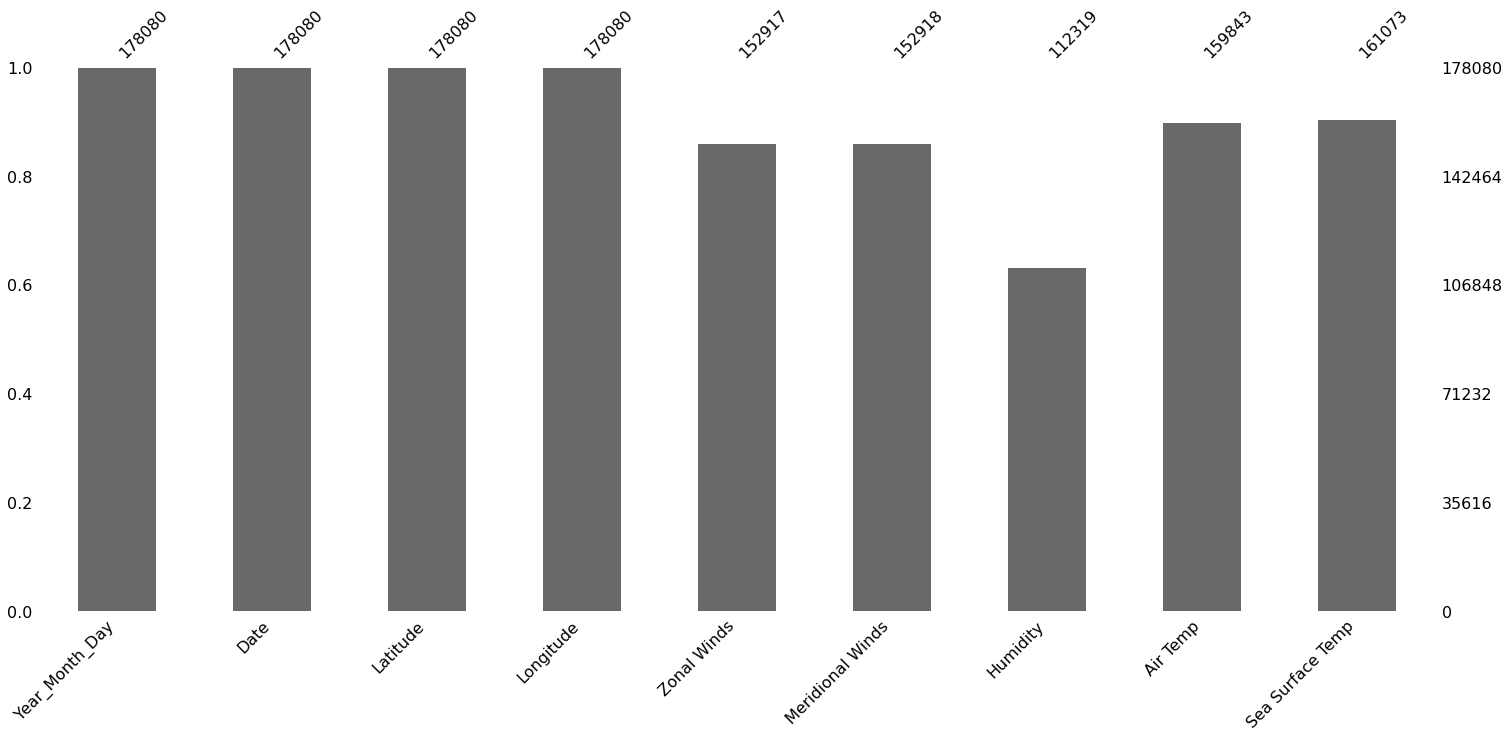

In [9]:
# show the number of missing values using visualization
import missingno as msno

msno.bar(nino)

In [10]:
# remove rows that contain missing values
nino = nino.dropna(axis=0)
nino

,Year_Month_Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
4059,1993-05-09,930509,-0.02,-109.96,-2.1,2.1,81.2,26.80,27.02
4060,1993-05-10,930510,-0.02,-109.96,-3.4,1.4,84.2,26.95,26.91
4061,1993-05-11,930511,-0.02,-109.96,-3.8,2.2,84.9,26.98,26.78
4062,1993-05-12,930512,-0.02,-109.96,-3.0,1.5,86.9,26.93,26.74
4063,1993-05-13,930513,-0.02,-109.96,-4.5,1.9,87.6,27.01,26.82
...,...,...,...,...,...,...,...,...,...
178074,1998-06-10,980610,8.95,-140.33,-6.8,-5.3,81.3,27.52,28.17
178075,1998-06-11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,1998-06-12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87
178077,1998-06-13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93


In [11]:
# Correlate sea surface temp with other variables
nino.corr()['Sea Surface Temp']

Date                0.052066
Latitude            0.125119
Longitude           0.304027
Zonal Winds         0.376015
Meridional Winds   -0.284897
Humidity           -0.324348
Air Temp            0.940233
Sea Surface Temp    1.000000
Name: Sea Surface Temp, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


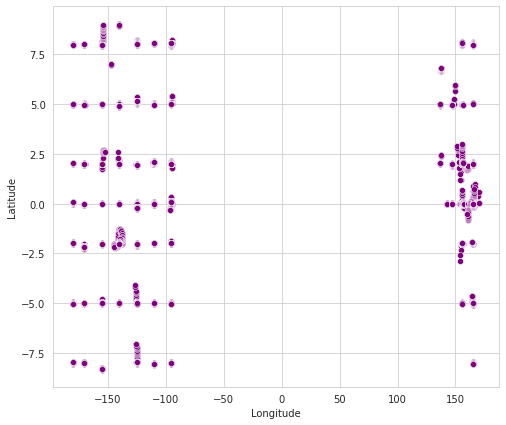

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,7))
sns.scatterplot('Longitude', 'Latitude', data=nino, color='purple')

In [13]:
# Drop year-month-day and date columns from dataset
nino.drop(columns=['Year_Month_Day', 'Date'], axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
nino

,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
4059,-0.02,-109.96,-2.1,2.1,81.2,26.80,27.02
4060,-0.02,-109.96,-3.4,1.4,84.2,26.95,26.91
4061,-0.02,-109.96,-3.8,2.2,84.9,26.98,26.78
4062,-0.02,-109.96,-3.0,1.5,86.9,26.93,26.74
4063,-0.02,-109.96,-4.5,1.9,87.6,27.01,26.82
...,...,...,...,...,...,...,...
178074,8.95,-140.33,-6.8,-5.3,81.3,27.52,28.17
178075,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87
178077,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93


Predictive Models - Linear Regression, Ridge Regression and Knn and Decision Tree

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [ ]:
X=nino.drop('Sea Surface Temp', axis=1)
y=nino['Sea Surface Temp']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)
X

In [17]:
# Define the a function, that can be called for all models
def Predictive_Model(estimator):
    estimator.fit(train_X, train_y)
    prediction = estimator.predict(test_X)
    print('R_squared:', metrics.r2_score(test_y, prediction))
    print('Square Root of MSE:',np.sqrt(metrics.mean_squared_error(test_y, prediction)))
    plt.figure(figsize=(10,5))
    sns.distplot(test_y, hist=True, kde=False)
    sns.distplot(prediction, hist=True, kde=False)
    plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
    plt.xlim(0,)

In [18]:
# Function that defines magnitude of each coefficient
def FeatureBar(model_Features, Title, yLabel):
    plt.figure(figsize=(10,5))
    plt.bar(nino.columns[nino.columns!='Sea Surface Temp'].values, model_Features)
    plt.xticks(rotation=45)
    plt.title(Title)
    plt.ylabel(yLabel)

Basic Prediction - Linear Regression

R_squared: 0.9120690361149137
Square Root of MSE: 0.5524855619133298


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


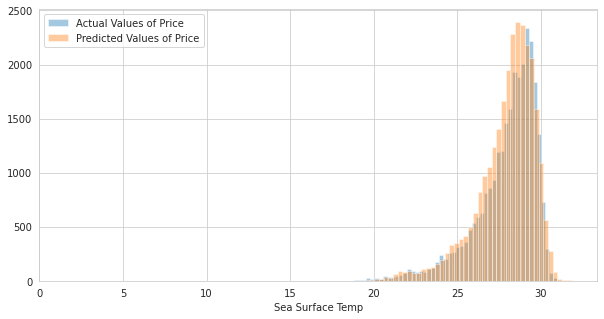

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
Predictive_Model(lr)

The first one is the coefficient of determination, which is usually expressed as R². The coefficient of determination is the ratio of the variance of a target explained or predicted by a model over the total variance of the target. It ranges from 0 to 1, and as the value is closer to 1, the model explains or predicts the variance of the target better.

The second metric is the Mean Squared Error(MSE). The MSE is the average of the squared difference between the estimated or predicted values and the actual values of a target. This is always greater than zero. A lower value of the MSE indicates higher accuracy of predictions of a model. In this analysis, I use the square root of this metric(RMSE).

Linear regression - R² is 0.91 which means 91% of the sea surface temp can be predicted by the model. 

The RMSE is 0.55. This means that for all the predictions for the testing set, the average difference for each prediction is 0.55.

Each coefficient of the linear regression represents the magnitude of the impact of the feature on the target. The bar chart below shows the magnitudes for each coefficient in the model.

In [20]:
lr.coef_

array([1.40829770e-02, 2.81570964e-04, 8.27624481e-02, 8.51693124e-03,
       4.07947714e-03, 1.01363589e+00])

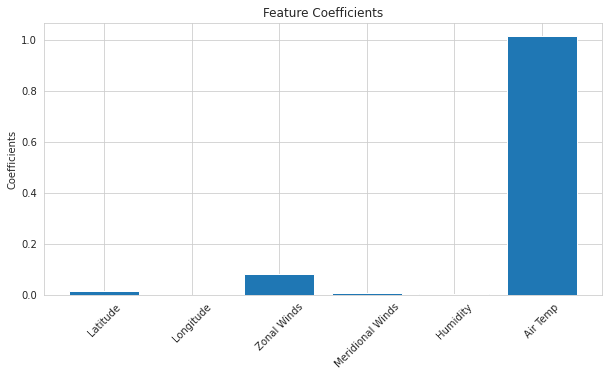

In [21]:
# Use featurebar function and predict the magnitude of each coefficient in the model
FeatureBar(lr.coef_, 'Feature Coefficients', 'Coefficients')

The coefficients for - longitude, Meridional Winds and Humidity in the model have least impact on the sea surface temperature. 

Zonal Winds and Air temp have an impact in predicting sea surface temp.

kNN Regressor with k=5

R_squared: 0.9358772601107423
Square Root of MSE: 0.4717979523392589


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


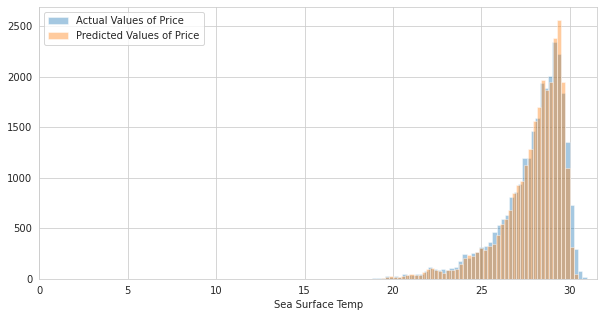

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
Predictive_Model(knn)

The KNN model makes predictions for the target using the target values of K-nearest neighbors. The result above is obtained with the number of the neighbors equal to 5. The R² of this model is 0.935, and the RMSE is 0.47.

Compared to the distributions of the predicted values from linear and KNN model seems to predict the sea surface temp better.

Decision Tree Regressor

R_squared: 0.9398155233088793
Square Root of MSE: 0.4570800439883308


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


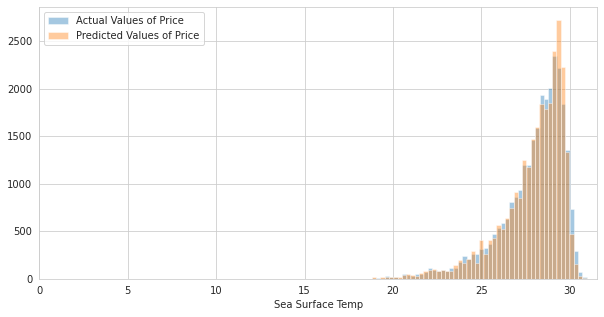

In [23]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15, random_state=0)
Predictive_Model(dt)

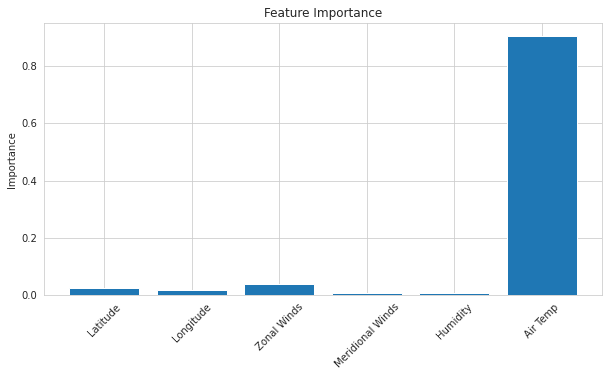

In [24]:
FeatureBar(dt.feature_importances_, 'Feature Importance', 'Importance')

The decision tree does not create any coefficients for the features used in the prediction. However, by calculating how much the mean squared error decreases by selecting a feature for splits, we can measure the importance of each feature in the decision tree model. 

In our dataset, air temp still appear to be most important in the predictions, and also noticed few other features like Longitude, Meridional Winds and Humidity to have a minute effect on sea surface temp.

Performance Summary

In [25]:
regressor = ['Linear Regression', 'KNN', 'Decision Tree']
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=5), DecisionTreeRegressor(max_depth=15, random_state=0)]
R_squared = []
RMSE = []
for m in models:
    m.fit(train_X, train_y)
    prediction_m = m.predict(test_X)
    r2 = metrics.r2_score(test_y, prediction_m)
    rmse = np.sqrt(metrics.mean_squared_error(test_y, prediction_m))
    R_squared.append(r2)
    RMSE.append(rmse)
basic_result = pd.DataFrame({'R squared':R_squared,'RMSE':RMSE}, index=regressor)
print("Summary of Basic Results:")
basic_result

Summary of Basic Results:


,R squared,RMSE
Linear Regression,0.912069,0.552486
KNN,0.935877,0.471798
Decision Tree,0.939816,0.457080


In the table above, the *Decision Tree* seems to be the optimal model to predict the Sea Surface Temp in Pacific Ocean. However, it is too early to make a conclusion since there are more things to be considered. 

The first is that we use only one specific selection of a training and testing sets, and the second is that for each model we chose one specific value for each hyper parameter. Since the values were chosen arbitrarily for the hyper parameters, the results can vary according to what values we choose for those parameters.

To get a robust result covering these issues, we need to go through the cross validation and grid search process as well.

### Cross Validation and Grid Search
Linear Regression

In [26]:
scoring={'R_squared':'r2', 'Square Root of MSE': 'neg_mean_squared_error'}

In [27]:
def CrossVal(estimator):
    scores = cross_validate(estimator, X, y, cv=5, scoring=scoring)
    r2 = scores['test_R_squared'].mean()
    mse = abs(scores['test_Square Root of MSE'].mean())
    print('R_squared:', r2)
    print('Square Root of MSE:', np.sqrt(mse))

In [28]:
CrossVal(LinearRegression())

R_squared: 0.8991446822431355
Square Root of MSE: 0.5682419569232426


Since the linear regression does not have any hyper parameter in our analysis, only CV is performed here. The number of the folds in the CV is set to be 5. The average of the R² is 0.89 and the RMSE is 0.56

K-Nearest Neighbors:
The hyper parameter for KNN we use in this analysis is the number of the nearest neighbors(n_neighbors). The range for the grid is the integers from 5 to 10.

Since GridSearchCV in sklearn includes the process of the Cross Validation, the process of performing cross_validate is omitted. 

In [29]:
# Create a grid search function that takes in the estimator, features and parameters
from sklearn.model_selection import GridSearchCV

def GridSearch(estimator, Features, Target, param_grid):
    for key, value in scoring.items():
        grid = GridSearchCV(estimator, param_grid, cv=10, scoring=value)
        grid.fit(Features,Target)
        print(key)
        print('The Best Parameter:', grid.best_params_)
        if grid.best_score_ > 0:
            print('The Score:', grid.best_score_)
        else:
            print('The Score:', np.sqrt(abs(grid.best_score_)))
        print()

In [30]:
param_grid = dict(n_neighbors=np.arange(5,26))

GridSearch(KNeighborsRegressor(), X, y, param_grid)

R_squared
The Best Parameter: {'n_neighbors': 16}
The Score: 0.8510733582554536

Square Root of MSE
The Best Parameter: {'n_neighbors': 16}
The Score: 0.6009227105104002



The optimal number of n_neighbors is 16. The R² is 0.851 and the RMSE is 0.6. We can see how 16 is the optimal value for n_neighbors in our analysis by looking at the Validation Curve.

In [35]:
from sklearn.model_selection import validation_curve

def ValidationCurve(estimator, Features, Target, param_name, Name_of_HyperParameter, param_range):
    
    train_score, test_score = validation_curve(estimator, Features, Target, param_name=param_name, param_range= param_range,cv=10,scoring='r2')
    Rsquared_train = train_score.mean(axis=1)
    Rsquared_test= test_score.mean(axis=1)
    
    plt.figure(figsize=(10,5))
    plt.plot(param_range, Rsquared_train, color='r', linestyle='-', marker='o', label='Training Set')
    plt.plot(param_range, Rsquared_test, color='b', linestyle='-', marker='x', label='Testing Set')
    plt.legend(labels=['Training Set', 'Testing Set'])
    plt.xlabel(Name_of_HyperParameter)
    plt.ylabel('R_squared')

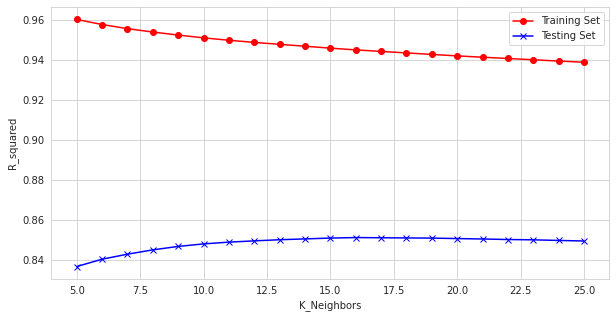

In [36]:
# KNN Validation Curve
ValidationCurve(KNeighborsRegressor(), X, y, param_name='n_neighbors', Name_of_HyperParameter='K_Neighbors', param_range = np.arange(5,26), )

Decision Tree - hyper parameters selection

In [37]:
param_grid=dict(max_depth=np.arange(2,15))

GridSearch(DecisionTreeRegressor(random_state=0), X, y, param_grid)

R_squared
The Best Parameter: {'max_depth': 9}
The Score: 0.8887238489659964

Square Root of MSE
The Best Parameter: {'max_depth': 9}
The Score: 0.5163982264777722



The result indicates that the optimal value for the max_depth is 9. The R² is 0.88 and the RMSE is 0.51 under max_depth=9. 

Let's draw the validation curve.

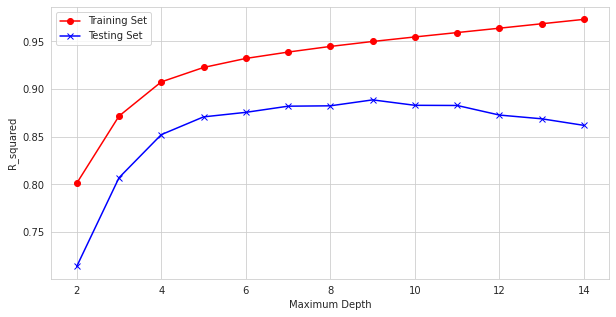

In [38]:
# Decision Tree Regressor - Validation Curev

ValidationCurve(DecisionTreeRegressor(random_state=0), X, y, param_name='max_depth', 
                Name_of_HyperParameter='Maximum Depth', param_range = np.arange(2,15), )

## Cross Validation Summary

Now that we have the hyperparameters for knn and decision tree we can summarize the cross validation table.
The table and the graphs below shows the scores of the R² for each round of testing in CV. Since cv is set to be 10, we have 10 rounds of testings.


In [39]:
# Table - with same cv=10
lr_scores = cross_validate(LinearRegression(), X, y, cv=10, scoring='r2')
knn_scores = cross_validate(KNeighborsRegressor(n_neighbors=16), X, y, cv=10, scoring='r2')
dt_scores = cross_validate(DecisionTreeRegressor(max_depth=9, random_state=0), X, y, cv=10, scoring='r2')

lr_test_score = lr_scores.get('test_score')
knn_test_score = knn_scores.get('test_score')
dt_test_score = dt_scores.get('test_score')

box= pd.DataFrame({'Linear Regression':lr_test_score, 'K-Nearest Neighbors':knn_test_score, 'Decision Tree':dt_test_score})
box.index = box.index + 1
box.loc['Mean'] = box.mean()
box

,Linear Regression,K-Nearest Neighbors,Decision Tree
1,0.938738,0.916592,0.937776
2,0.931256,0.915346,0.934679
3,0.844145,0.841111,0.877514
4,0.909687,0.861453,0.917183
5,0.932827,0.935987,0.953179
6,0.639539,0.616568,0.705168
7,0.896386,0.861955,0.908387
8,0.890099,0.912355,0.931939
9,0.781909,0.743892,0.804713
10,0.892075,0.905474,0.916700


According to the result in the table, the best machine learning model in our analysis is the DECISION TREE since the mean of the scores for each round is the highest.

Text(0.5, 0, 'K-th Fold')

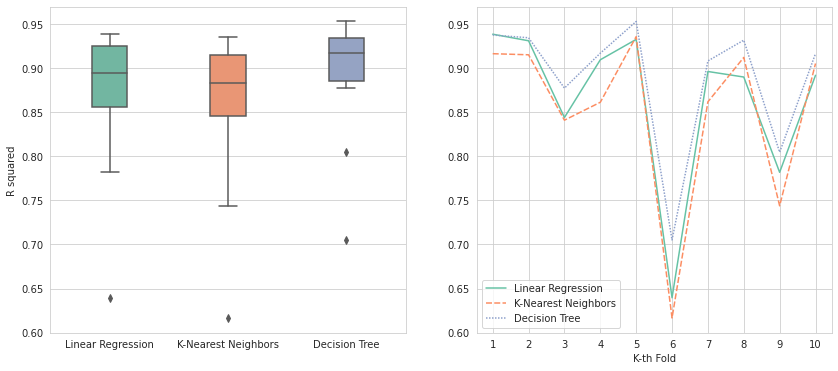

In [ ]:
f,ax=plt.subplots(1,2, figsize=(14,6))

sns.boxplot(data=box.drop(box.tail(1).index), width=0.3, palette="Set2", ax=ax[0])
ax[0].set_ylabel('R squared')

sns.lineplot(data=box.drop(box.tail(1).index), palette="Set2", ax=ax[1])
ax[1].set_xticks(np.arange(1,11,1))
ax[1].set_xlabel('K-th Fold')

The box and line plots above show the distributions and the changes of the scores for each model. The decision tree model as well as Linear Regression shows a good performance in this analysis. KNN did not show a significant difference in their performance.